In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

In [84]:
dataset=pd.read_csv('CAR_DETAILS.csv')

In [85]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [86]:
dataset.shape

(4340, 8)

In [87]:
dataset.isna().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [88]:
dataset.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [89]:
dataset.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


converting data into numerical value


In [90]:
dataset['fuel'].value_counts()

,count
fuel,
Diesel,2153
Petrol,2123
CNG,40
LPG,23
Electric,1


In [91]:
dataset['fuel'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4},inplace=True)

/tmp/ipython-input-61904901.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['fuel'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4},inplace=True)
/tmp/ipython-input-61904901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['fuel'].replace({'Petrol':0,'Diesel':1,'C

In [92]:
dataset['seller_type'].value_counts()

,count
seller_type,
Individual,3244
Dealer,994
Trustmark Dealer,102


In [93]:
dataset['seller_type']=dataset['seller_type'].replace({'Individual':0,'Dealer':1,'Trustmark Dealer':2})

/tmp/ipython-input-1001402331.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['seller_type']=dataset['seller_type'].replace({'Individual':0,'Dealer':1,'Trustmark Dealer':2})


In [94]:
dataset['transmission'].value_counts()

,count
transmission,
Manual,3892
Automatic,448


In [95]:
dataset['transmission']=dataset['transmission'].replace({'Manual':0,'Automatic':1})

/tmp/ipython-input-2961354901.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['transmission']=dataset['transmission'].replace({'Manual':0,'Automatic':1})


In [96]:
dataset['owner'].value_counts()

,count
owner,
First Owner,2832
Second Owner,1106
Third Owner,304
Fourth & Above Owner,81
Test Drive Car,17


In [97]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,Second Owner


In [98]:
dataset['owner']=dataset['owner'].replace({'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4})

/tmp/ipython-input-2668165285.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['owner']=dataset['owner'].replace({'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4})


In [99]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,0,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,0,0,1


Splitting

In [100]:
X=dataset.drop(['selling_price', 'name'],axis=1)
Y=dataset['selling_price']

In [101]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)

In [102]:
print(X.shape,X_train.shape,X_test.shape)

(4340, 6) (3906, 6) (434, 6)


### Decision Tree Regressor Model

In [116]:
from sklearn.tree import DecisionTreeRegressor

In [117]:
dt_model = DecisionTreeRegressor(random_state=2)
dt_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=2)

In [118]:
dt_train_pred = dt_model.predict(X_train)
dt_train_r2 = r2_score(Y_train, dt_train_pred)
print(f'Decision Tree R-squared on training data: {dt_train_r2}')

Decision Tree R-squared on training data: 0.9594733866175452


<Axes: xlabel='selling_price'>

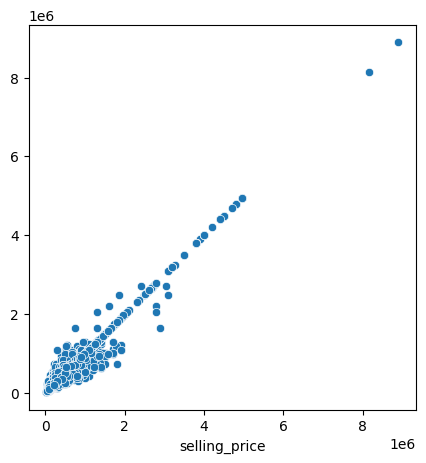

In [124]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=Y_train, y=dt_train_pred)

Decision Tree models often perform very well on training data (sometimes to the point of overfitting). Let's also evaluate the model's performance on the test set to get a more realistic idea of its generalization capabilities.

In [120]:
dt_model.fit(X_test,Y_test)

DecisionTreeRegressor(random_state=2)

In [126]:
dt_test_pred = dt_model.predict(X_test)
dt_test_r2 = r2_score(Y_test, dt_test_pred)
print(f'Decision Tree R-squared on test data: {dt_test_r2}')

Decision Tree R-squared on test data: 0.9965530515942734


<Axes: xlabel='selling_price'>

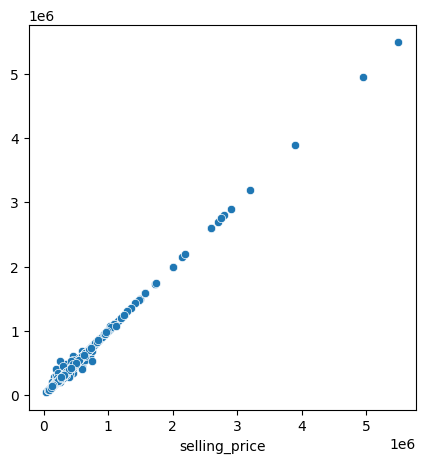

In [127]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=Y_test, y=dt_test_pred)